In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [49]:
df=pd.read_csv("/Users/dhruvkhosla/Downloads/Patient Survival Prediction.csv")

In [50]:
df.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [51]:
df.tail()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,NaN,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
91712,1671,53612,104,82.0,22.031250,1,Caucasian,F,160.0,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Gastrointestinal,Gastrointestinal,NaN,0


In [52]:
df.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'age', 'bmi',
       'elective_surgery', 'ethnicity', 'gender', 'height', 'icu_admit_source',
       'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative',
       'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max',
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_

In [53]:
df.dtypes

encounter_id                     int64
patient_id                       int64
hospital_id                      int64
age                            float64
bmi                            float64
                                ...   
solid_tumor_with_metastasis    float64
apache_3j_bodysystem            object
apache_2_bodysystem             object
Unnamed: 83                    float64
hospital_death                   int64
Length: 85, dtype: object

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [55]:
df.describe()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,Unnamed: 83,hospital_death
count,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,88993.000000,...,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,0.0,91713.000000
mean,65606.079280,65537.131464,105.669262,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,84.028340,...,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,NaN,0.086302
std,37795.088538,37811.252183,62.854406,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,25.011497,...,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,NaN,0.280811
min,1.000000,1.000000,2.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,38.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,32852.000000,32830.000000,47.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,66.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
50%,65665.000000,65413.000000,109.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,80.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
75%,98342.000000,98298.000000,161.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,97.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
max,131051.000000,131051.000000,204.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,186.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000


In [56]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death


In [57]:
df.isnull()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
91709,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
91710,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
91711,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [58]:
df.drop(['Unnamed: 83'], axis='columns', inplace = True)

In [59]:
df.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'age', 'bmi',
       'elective_surgery', 'ethnicity', 'gender', 'height', 'icu_admit_source',
       'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative',
       'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max',
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_

In [60]:
# Correlation Matrix to check if any two collumn are correlated.
df.corr()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,...,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
encounter_id,1.000000,-0.009575,-0.004532,-0.003990,-0.001068,0.002036,-0.005400,-0.000992,-0.000570,-0.004376,...,0.000344,0.001907,0.007601,0.003402,-0.000972,-0.001707,-0.002172,-0.001176,-0.004646,-0.005243
patient_id,-0.009575,1.000000,-0.007075,0.006343,-0.001380,0.001387,0.002902,-0.001770,-0.004412,0.000275,...,0.001625,-0.002426,0.001307,0.000434,-0.001667,0.000548,0.000844,0.002333,-0.003065,0.004877
hospital_id,-0.004532,-0.007075,1.000000,-0.008673,0.012874,0.052123,0.027895,0.004526,-0.001285,0.026314,...,-0.000283,-0.004947,0.002962,0.011978,0.001362,0.000146,-0.002992,0.002588,-0.004730,-0.001255
age,-0.003990,0.006343,-0.008673,1.000000,-0.087077,0.067320,-0.109937,-0.024257,0.049872,-0.127252,...,0.076275,-0.029477,-0.028065,0.077908,-0.020061,0.025007,0.030310,0.023335,0.025924,0.111017
bmi,-0.001068,-0.001380,0.012874,-0.087077,1.000000,0.015921,-0.056316,0.001403,-0.001531,0.877339,...,-0.013796,-0.020434,-0.002377,0.172943,-0.001855,-0.031144,-0.013375,-0.010017,-0.043380,-0.031247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
immunosuppression,-0.001707,0.000548,0.000146,0.025007,-0.031144,-0.014695,0.000530,-0.031111,0.032695,-0.029642,...,0.026268,0.025781,-0.002971,-0.002502,0.003084,1.000000,0.134934,0.103201,0.269653,0.043973
leukemia,-0.002172,0.000844,-0.002992,0.030310,-0.013375,-0.017587,0.001718,0.001014,0.041853,-0.012755,...,0.031966,-0.002471,-0.005373,0.002890,-0.001567,0.134934,1.000000,0.031380,0.006210,0.029788
lymphoma,-0.001176,0.002333,0.002588,0.023335,-0.010017,-0.008215,0.008370,-0.002336,0.013954,-0.005197,...,0.011287,0.021529,0.001516,-0.002326,0.001689,0.103201,0.031380,1.000000,0.014749,0.018722
solid_tumor_with_metastasis,-0.004646,-0.003065,-0.004730,0.025924,-0.043380,0.015369,0.004921,-0.014381,0.036581,-0.039255,...,0.028090,-0.001611,-0.005890,-0.013122,0.007240,0.269653,0.006210,0.014749,1.000000,0.051105


In [61]:
num_atr =['encounter_id','patient_id','hospital_id','age','bmi','height', ]
cat_atr =['elective_surgery','ethnicity','gender', 'icu_admit_source', 'diabetes_mellitus','hepatic_failure','immunosuppression','leukemia','lymphoma','solid_tumor_with_metastasis','apache_3j_bodysystem','apache_2_bodysystem']

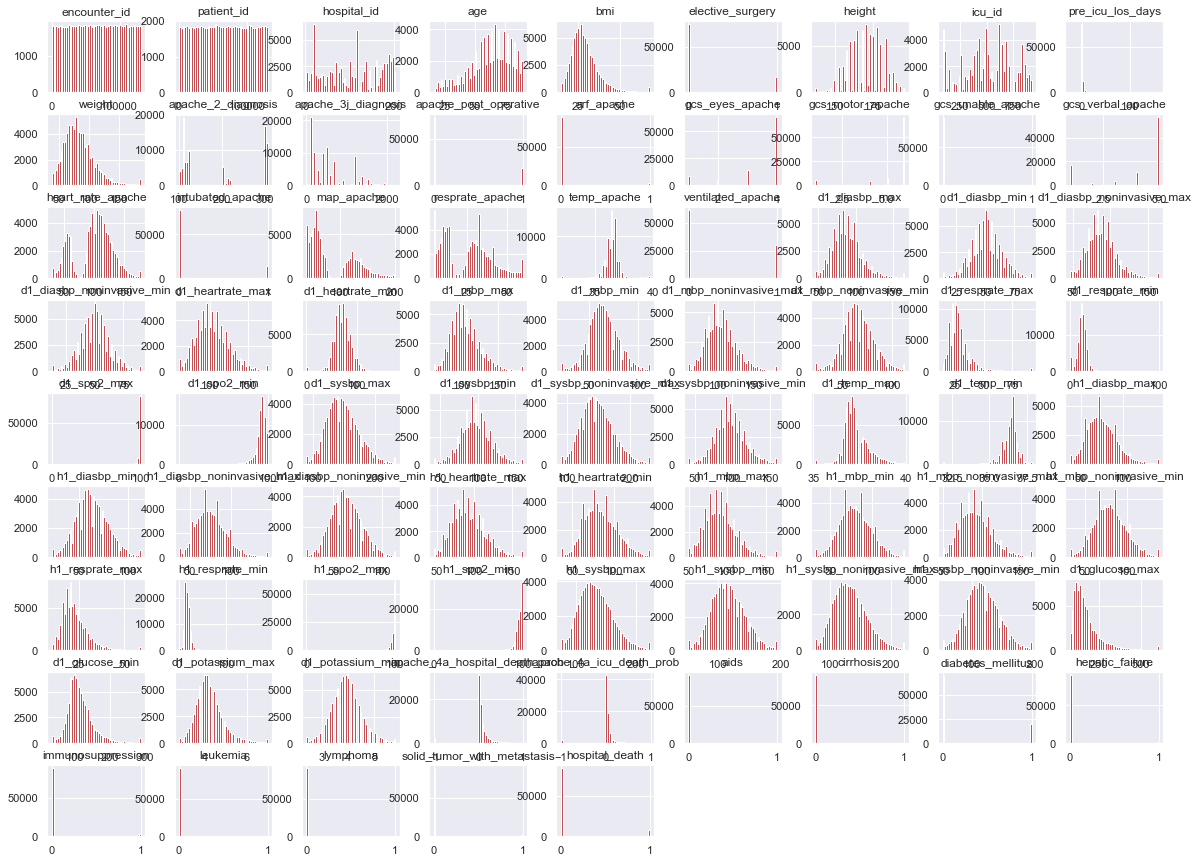

In [62]:
df.hist(bins=50, figsize=(20,15), color='r')
plt.show()

<AxesSubplot:>

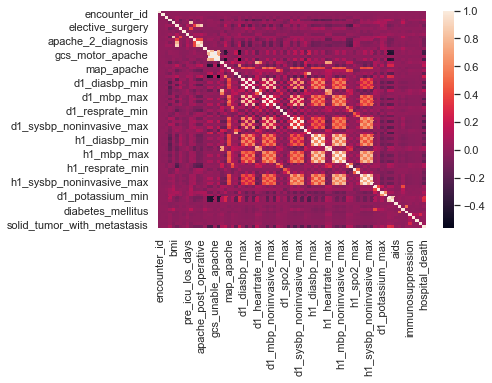

In [63]:
df_corr=df.corr()
sns.heatmap(df_corr)

In [64]:
#KNN CLASSIFICATION ALGORITHM

In [65]:
# Dividing the dataset into independent variables and target variables
X= df.drop(['hospital_death'], axis=1)


In [66]:
# Dividing the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

NameError: name 'y' is not defined

In [ ]:
# Using StandardScaler for normal distribution of numerical data
from sklearn.preprocessing import StandardScaler
stds = StandardScaler()
stds.fit_transform(X_train[num_atr])

In [ ]:
a1 = X_train[cat_atr]
b1 = stds.transform(X_train[num_atr])

X_train = np.hstack([a1,b1])

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

In [ ]:
# As testing dataset also contain categorical values it also needs to be converted into numerical values to apply KNN classifier
# Using LabelEncoder to convert categorical values of testing into numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
X_test[cat_atr].head()

In [ ]:
# Using StandardScaler for normal distribution of numerical data in testing data
stds.fit_transform(X_test[num_atr])

In [ ]:
a2 = X_test[cat_atr]
b2 = stds.transform(X_test[num_atr])

x_test = np.hstack([a2,b2])

In [ ]:
# predicting the values now using testing data
y_pred = knn.predict(x_test)

In [ ]:
#Checking the predicted values
y_pred

In [ ]:
#Performance measures for KNN Classifier Algorithm

In [ ]:
#Using confussion matrix to compare predicted values of target varable with testing values of target variable
confusion_matrix(y_test, y_pred)

In [ ]:
#DECISION TREE CLASSIFICATION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.utils import validation 
validation._assert_all_finite(X_test)

In [ ]:
X= df.drop(['hospital_death'], axis=1)
y= df['hospital_death']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
y.shape

In [ ]:
X.shape

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

In [ ]:
X_train[cat_atr].head()

In [ ]:
ss = StandardScaler()
ss.fit_transform(X_train[num_atr])

In [ ]:
a = X_train[cat_atr]
b = ss.transform(X_train[num_atr])

Xtr = np.hstack([a,b])
Xtr.shape 

In [ ]:
ss = StandardScaler()
ss.fit_transform(X_test[num_atr])
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
a1 = X_test[cat_atr]
b1 = ss.transform(X_test[num_atr])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

In [ ]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=None)

In [ ]:
X = np.nan_to_num(X) 

In [ ]:
from sklearn.utils import validation
validation._assert_all_finite(X_test)
dt.dropna()
dt.fit(Xtr,y_train)